In [1]:
#
#NA-04
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '04';name1 = 'na'+name0;name2 = 'na-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA04.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)

7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 87.0312 78.8477 1.7201 24.5576 2.4897
2974.7444 3083.558 3103.5224


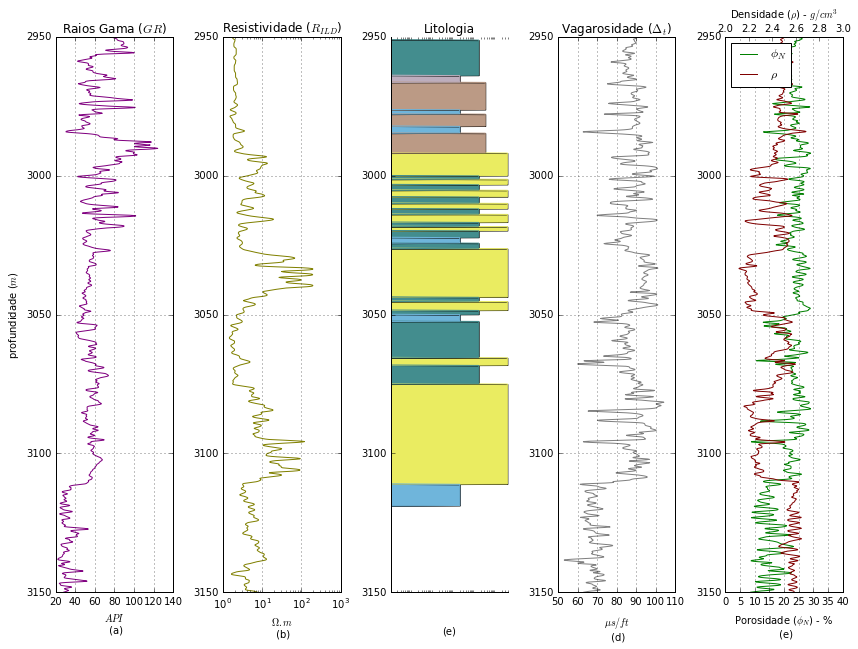

In [2]:
#
#Litologia
#
are = [0]*p;sil = [0]*p;cal = [0]*p;arg = [0]*p;mar = [0]*p

for i in range (p):
    if prof[i] >= 2966.2698 and prof[i] < 2976.1905:sil[i] = 70
    if prof[i] >= 2977.7778 and prof[i] < 2982.1429:sil[i] = 70
    if prof[i] >= 2984.5238 and prof[i] < 2991.6667:sil[i] = 70
    #----------------------------------------------#
    if prof[i] >= 2991.6667 and prof[i] < 3000.0000:are[i] = 90
    if prof[i] >= 3001.1905 and prof[i] < 3003.1746:are[i] = 90
    if prof[i] >= 3005.1587 and prof[i] < 3007.5397:are[i] = 90
    if prof[i] >= 3009.9206 and prof[i] < 3011.9048:are[i] = 90
    if prof[i] >= 3013.8889 and prof[i] < 3016.6667:are[i] = 90
    if prof[i] >= 3018.2540 and prof[i] < 3019.8413:are[i] = 90
    if prof[i] >= 3026.1905 and prof[i] < 3043.6508:are[i] = 90
    if prof[i] >= 3045.2381 and prof[i] < 3048.4127:are[i] = 90
    if prof[i] >= 3065.4762 and prof[i] < 3068.2540:are[i] = 90
    if prof[i] >= 3075.0000 and prof[i] < 3111.1111:are[i] = 90
    #----------------------------------------------#
    if prof[i] >= 2976.1905 and prof[i] < 2977.7778:cal[i] = 60
    if prof[i] >= 2982.1429 and prof[i] < 2984.5238:cal[i] = 60
    if prof[i] >= 3022.2222 and prof[i] < 3024.2064:cal[i] = 60
    if prof[i] >= 3050.0000 and prof[i] < 3052.3810:cal[i] = 60
    if prof[i] >= 3111.1111 and prof[i] < 3118.8413:cal[i] = 60
    #----------------------------------------------#
    if prof[i] >= 2951.0000 and prof[i] < 2963.8889:arg[i] = 50
    if prof[i] >= 3000.0000 and prof[i] < 3001.1905:arg[i] = 50
    if prof[i] >= 3003.1746 and prof[i] < 3005.1587:arg[i] = 50
    if prof[i] >= 3007.5397 and prof[i] < 3009.9206:arg[i] = 50
    if prof[i] >= 3011.9048 and prof[i] < 3013.8889:arg[i] = 50
    if prof[i] >= 3016.6667 and prof[i] < 3018.2540:arg[i] = 50
    if prof[i] >= 3019.8413 and prof[i] < 3022.2222:arg[i] = 50
    if prof[i] >= 3024.2064 and prof[i] < 3026.1905:arg[i] = 50
    if prof[i] >= 3043.6508 and prof[i] < 3045.2381:arg[i] = 50
    if prof[i] >= 3048.4127 and prof[i] < 3050.0000:arg[i] = 50
    if prof[i] >= 3052.3810 and prof[i] < 3065.4762:arg[i] = 50
    if prof[i] >= 3068.2540 and prof[i] < 3075.0000:arg[i] = 50
    #----------------------------------------------#
    if prof[i] >= 2963.8889 and prof[i] < 2966.2698:mar[i] = 60

arem = [1e-6]*p;silt = [1e-6]*p;shal = [1e-6]*p;calu = [1e-6]*p;marl = [1e-6]*p # mao - Marga

for i in range(p):
    if are[i] == 90:arem[i] = 0.375
    if sil[i] == 70:silt[i] = 0.033
    if arg[i] == 50:shal[i] = 0.016
    if cal[i] == 60:calu[i] = 0.002
    if mar[i] == 60:marl[i] = 0.002
del(are,sil,arg,mar,cal)
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.326017066345 media (IGR) - indice de raio gama
0.130218060788  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

14.6077227428  media (PHItd)%
6.90492189546  media (PHIsh)%
221  ponto de folhelho (Psh)
22.09737827715356 = porosidade sh tabelada| 22.09737827715356 = porosidade sh calculada
13.8511297492 = porosidade D, tabelada| 14.5809897903 = porosidade D, calculada
19.5361102693 = porosidade S, tabelada| 21.294660611 = porosidade, S calculada


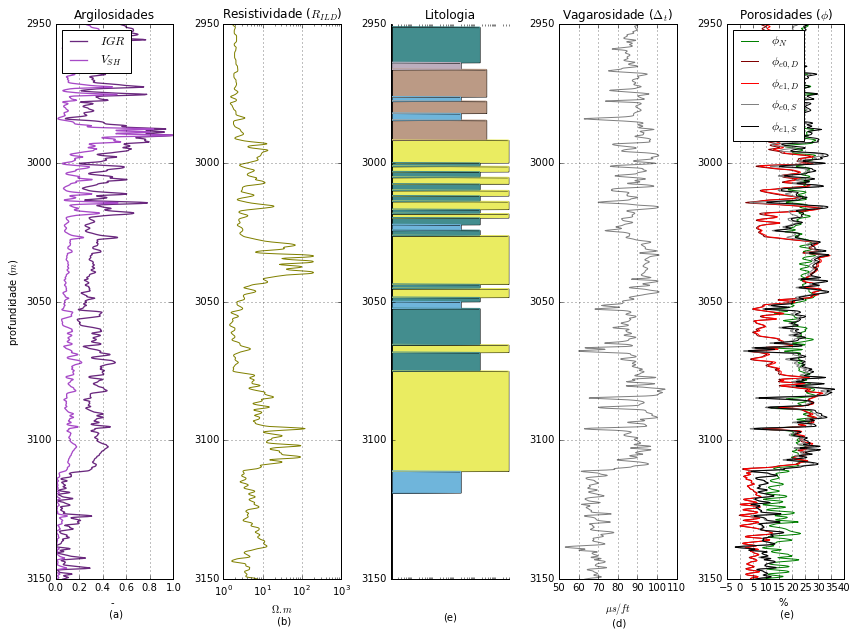

In [3]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = [];PHIes0 = [];PHIes1 = []

DTPsh = DTP[Psh]
for i in range (p):
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
    PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
print (mean(PHIes0),'= porosidade S, tabelada|',mean(PHIes1),'= porosidade, S calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e0,S}$')
ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético (teste) -</font></center>
<br>
<br>
<br>Augusto 1 - $V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.43 − 4.05 \phi_{e,D} − 1.38 V_{sh} + 2.40 × 10^{−3} R_{ILD}$
<br>Augusto 2 - $V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.80 − 8.20 \phi_{e,D} − 4.31 V_{sh} + 12.72\phi_{e,D} V_{sh} + 10.42 \phi_{e,D}^2 + 2.57 V_{sh}^2$


In [4]:
#---------------------------------------------------Estimando VP-------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
pet = u"- Petrofísico"; emp = u"- Empírico";petp = name1+pet;empp = name1+emp # nomeclatura
#------------------------------------------------Modelo Petrofisico----------------------------------------------#
DTPp = [];VPp=[];errorP = []
for i in range (p):
    DTPp0 = (DTPma + (DTPf - DTPma)*((PHIed0[i]/100.0)+(VSH[i]*(PHIs0/100.0))));DTPp.append(DTPp0)
    VPp0 = (1.00/(cfvp*DTPp0));errorP.append(abs(VP[i]-VPp0));VPp.append(VPp0)

print('rP  =',np.corrcoef(VP,VPp)[0,1],'|mP  =',np.mean(errorP),'|stdP  =',np.std(errorP))
#--------------------------------------------------Modelo Empirico-----------------------------------------------#
VPe1=[];VPe2=[];VPe_02=[];VPe_07=[];VPe_12=[];VPe_37=[];VPe_RJS42=[];VPe_RJS19=[];errorE1=[];errorE2=[]

for i in range (p): # determinando VPa em ms
    VPe01=(1000*(4.80 - (8.20*PHIed1[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIed1[i]/100.0)*VSH[i]) 
    + (10.42*((PHIed1[i]/100)**2)) + (2.57*VSH[i]**2)));errorE1.append(abs(VP[i]-VPe01));VPe1.append(VPe01)
    VPe02=(1000*(4.43 -(4.05*PHIed1[i]/100.0) - (1.38*VSH[i]) + (2.40*(ILD[i])*10**(-3))))
    errorE2.append(abs(VP[i]-VPe02));VPe2.append(VPe02)
    VPe_02.append(1000*(4.29 - (2.66*PHIed1[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5)))))
    VPe_07.append(1000*(4.84 - (8.43*PHIed1[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIed1[i]/100.0)*VSH[i]) 
    + (8.94*((PHIed1[i]/100)**2)) + (2.25*VSH[i]**2)))
    VPe_12.append(1000*(4.28 - (5.63*PHIed1[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIed1[i]/100.0)*VSH[i]) 
    + 6.76*(PHIed1[i]/100.0)**2 + (0.85*(VSH[i])**2)))
    VPe_37.append(1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2)))))
    VPe_RJS42.append(1000*(3.89 -(5.11*(PHIed1[i]/100.0)) - (0.82*VSH[i]) + (0.07*ILD[i]) 
    + (1.11*(PHIed1[i]/100.0)*VSH[i]) - (0.35*(PHIed1[i]/100.0)*ILD[i]) + ((9.16*(10**(-3)))*(VSH[i])*ILD[i])
    + (15.40*((PHIed1[i]/100)**2)) + (0.23*(VSH[i]**2)) - ((7.29*(10**(-4)))*(ILD[i]**2))))
    VPe_RJS19.append(1000*(4.63 - (9.82*PHIed1[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) 
    + (4.06*(PHIed1[i]/100)*VSH[i]) - (0.22*(PHIed1[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) 
    + (17.18*((PHIed1[i]/100)**2))+ (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2))))

print('rE1 =',np.corrcoef(VP,VPe1)[0,1],'|mE1 =',np.mean(errorE1),'|stdE1 =',np.std(errorE1))
print('rE2 =',np.corrcoef(VP,VPe2)[0,1],'|mE2 =',np.mean(errorE2),'|stdE2 =',np.std(errorE2));print();
print('rNA02',np.corrcoef(VP,VPe_02)[0,1]);print('rRJS19',np.corrcoef(VP,VPe_RJS19)[0,1]);
print('rNA07',np.corrcoef(VP,VPe_07)[0,1]);print('rNA12',np.corrcoef(VP,VPe_12)[0,1]);
print('rNA37',np.corrcoef(VP,VPe_37)[0,1]);print('rRJS42',np.corrcoef(VP,VPe_RJS42)[0,1])


rP  = 0.792162654353 |mP  = 409.249250427 |stdP  = 306.507045776
rE1 = 0.83038107505 |mE1 = 206.936028866 |stdE1 = 186.751656756
rE2 = 0.785219551192 |mE2 = 243.128342184 |stdE2 = 191.967480984

rNA02 0.75785441994
rRJS19 0.549228812961
rNA07 0.822526896872
rNA12 0.822191936287
rNA37 0.450563695
rRJS42 0.20762038852


[  55.5037791   188.99265037    2.93760318    0.54166792]


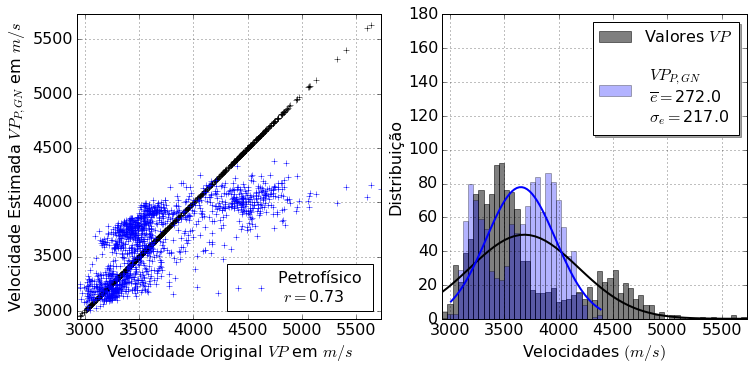

In [6]:
#
#Gauss-Newton
#
I4 = 1*np.identity(4);C = [55.500,189.000,2.650,1.101];CCC = [];III = [];valx = [];valy = []
for i in range (100):

    AA = [];BB = [];CC = [];DD = [];r  = []
    for i in range (p):
        AA.append( (RHOb[i] - C[3])/(C[2] - C[3]) );BB.append( (C[2] - RHOb[i])/(C[2] - C[3]) )
        CC.append( (C[0]-C[1])*(C[3]-RHOb[i])/(C[2] - C[3])**2 )
        DD.append( -(C[0]-C[1])*(C[2]-RHOb[i])/(C[2] - C[3])**2 )
        r.append(DTP[i] - (C[0] + (C[1] - C[0])*((RHOb[i] - C[2])/(C[3] - C[2]))))

    MM = [AA,BB,CC,DD]
    MT = np.transpose(MM)
    MMM = np.dot(MM,np.transpose(MM)) + I4
    
    MMI = np.linalg.inv(MMM)
    C1 = C + np.dot(MMI,np.dot(r,MT))
    #print (np.linalg.det(MMM))
    C = C1
    #print (C1)
    CCC.append(C1)
    III.append(i)
    
print (C1);DTPgn = [];VPgn = []
for i in range (p):
    DTPgn0 = ((C[0] + (C[1] - C[0])*((RHOb[i] - C[2])/(C[3] - C[2]))))
    DTPgn.append(DTPgn0);VPgn.append(1.0000/(cfvp*DTPgn0))
    
EPgn = []
for i in range(p):
    EPgn.append(abs(VPgn[i] - VP[i]))

from grafix import *
m = 'Petrofísico';x = '$VP_{P,GN}$'; y = '$VP$';c = 'b'
grafix2(VP,VPgn,m,x,y,c)